In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import sys
import yaml

SCRIPT_DIR = os.getcwd()
sys.path.append(os.path.dirname(SCRIPT_DIR))
print(SCRIPT_DIR) 

from visualisation_module import *
from helpers import *

path_to_plots = '../plots/'
path_to_results = '../results/'

#EX_CONFIG = load_config(config_path = '../../configs/smosmania_st.yaml')
EX_CONFIG = load_config(config_path = '../../configs/smosmania_st.yaml')

# List of paths to the .nc files
# '/perm/dadf/HSAF_validation/in_situ_data/pre_processed_data/ismn_nc/soil_TERENO_ISMN_2022.nc'
#dir_to_data = "/perm/dadf/HSAF_validation/in_situ_data/pre_processed_data/ismn_nc"
station_name = 'soil_SMOSMANIA_ISMN_2008.nc'
#def update_year(file_name, new_year):
#    return station_name.replace('2008', str(new_year))

#update_year(station_name, '2009')
#print(station_name)
#nc_files = ['soil_SMOSMANIA_ISMN_2008.nc']
#print(nc_files[0])

/etc/ecmwf/nfs/dh1_home_a/pamw/PycharmProjects/forecast-horizons/ecland-emulator/notebooks
Opening ../../configs/smosmania_st.yaml for experiment configuration.


In [2]:
dataset = xr.open_dataset(os.path.join('/perm/dadf/HSAF_validation/in_situ_data/pre_processed_data/ismn_nc',station_name ))
dataset
print(dataset.lat)
print(dataset.station_id)

all_stations = ['CabrieresdAvignon', 'Condom', 'CreondArmagnac', 'LaGrandCombe',
       'Lahas', 'LezignanCorbieres', 'Mazan-Abbaye', 'Mejannes-le-Clap',
       'Montaut', 'Mouthoumet', 'Narbonne', 'PeyrusseGrande', 'Pezenas-old',
       'Sabres', 'SaintFelixdeLauragais', 'Savenes', 'Urgons', 'Villevielle']

<xarray.DataArray 'lat' (station_id: 18)> Size: 72B
[18 values with dtype=float32]
Coordinates:
  * station_id  (station_id) <U21 2kB 'CabrieresdAvignon' ... 'Villevielle'
    lon         (station_id) float32 72B ...
    lat         (station_id) float32 72B ...
    network     (station_id) <U14 1kB ...
    elevation   (station_id) float32 72B ...
    land_class  (station_id) float32 72B ...
    clim_class  (station_id) <U3 216B ...
<xarray.DataArray 'station_id' (station_id: 18)> Size: 2kB
array(['CabrieresdAvignon', 'Condom', 'CreondArmagnac', 'LaGrandCombe',
       'Lahas', 'LezignanCorbieres', 'Mazan-Abbaye', 'Mejannes-le-Clap',
       'Montaut', 'Mouthoumet', 'Narbonne', 'PeyrusseGrande', 'Pezenas-old',
       'Sabres', 'SaintFelixdeLauragais', 'Savenes', 'Urgons', 'Villevielle'],
      dtype='<U21')
Coordinates:
  * station_id  (station_id) <U21 2kB 'CabrieresdAvignon' ... 'Villevielle'
    lon         (station_id) float32 72B ...
    lat         (station_id) float32 72B ...
    n

In [3]:
stations = ['Condom', 'Villevielle', 'LaGrandCombe', 'Narbonne']
stations_dict = {}
for station in stations:
    with open(f"../results/SMOSMANIA_{station}_2022_st_ensemble.yaml", 'r') as f:
        layers = yaml.load(f, Loader=yaml.UnsafeLoader)
    stations_dict[station] = layers

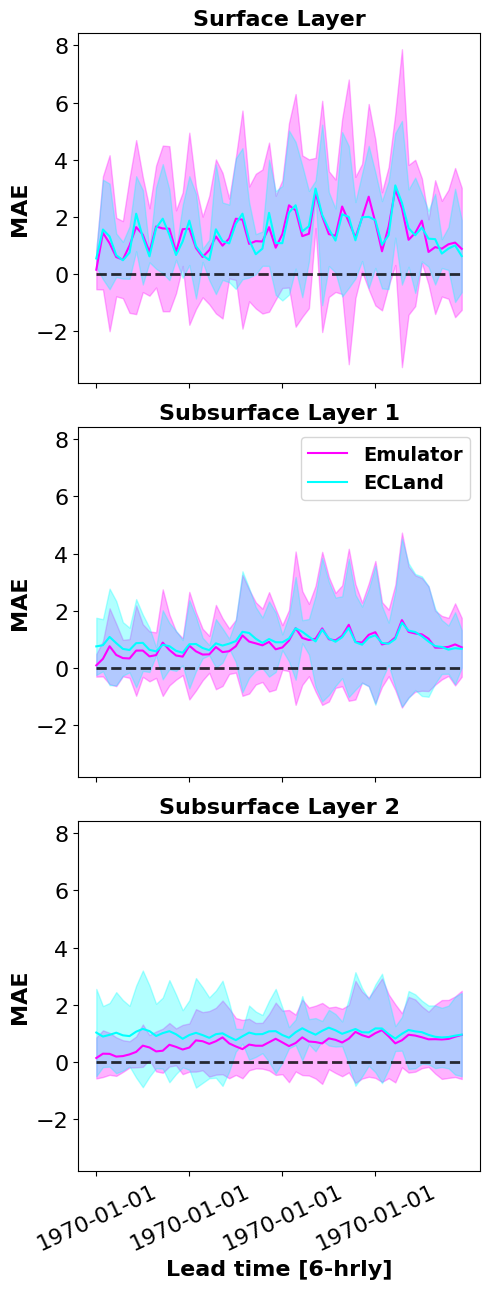

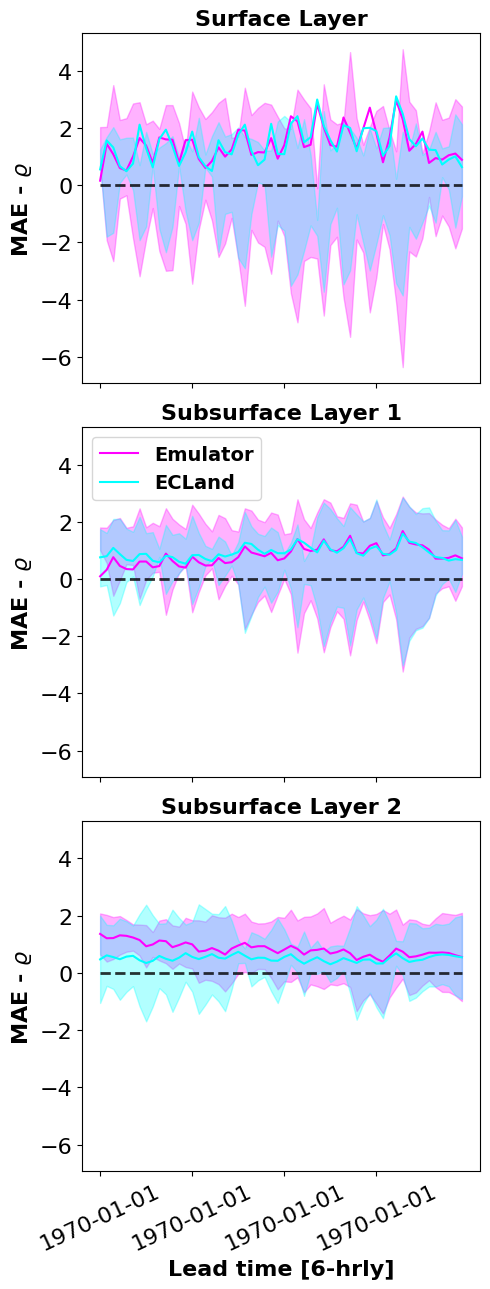

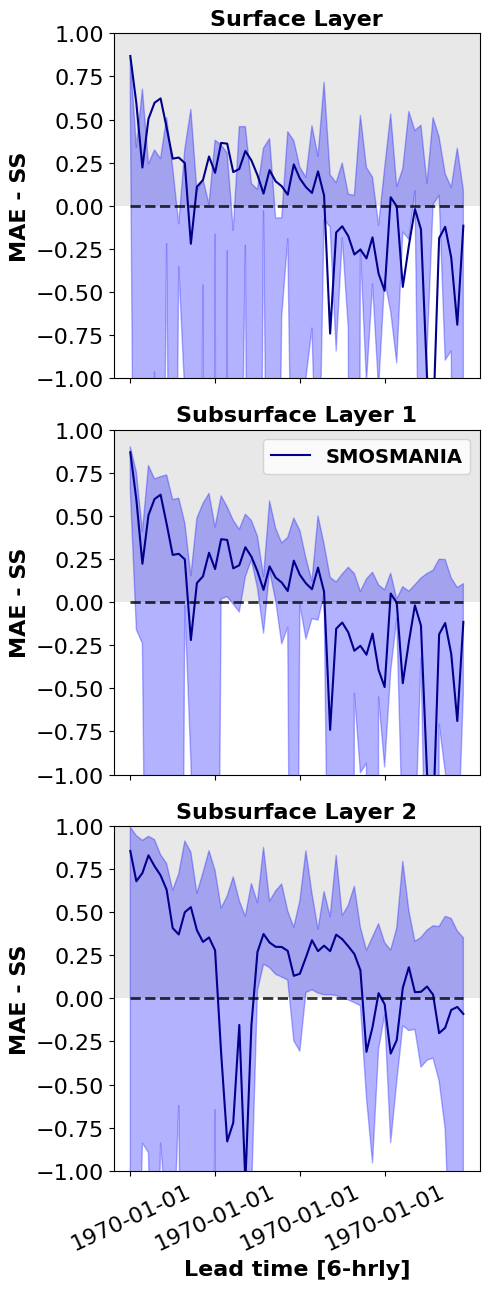

In [4]:
PlotStations = VisualisationMany(
                 network = EX_CONFIG["network"], 
                 station = "all", 
                 variable = EX_CONFIG["variable"], 
                 maximum_leadtime = EX_CONFIG["maximum_leadtime"], 
                 score = EX_CONFIG["score"],
                 doy_vector = None,
                 evaluation = "ens", 
                 path_to_plots = path_to_plots
)

PlotStations.assemble_scores(stations_dict)
PlotStations.plot_scores()
PlotStations.plot_horizons(EX_CONFIG["tolerance"])
PlotStations.plot_skill_scores()